# Customer Segmentation with RFM Analysis

![iStock-1205428317%20%281%29(1).jpg](attachment:iStock-1205428317%20%281%29(1).jpg)
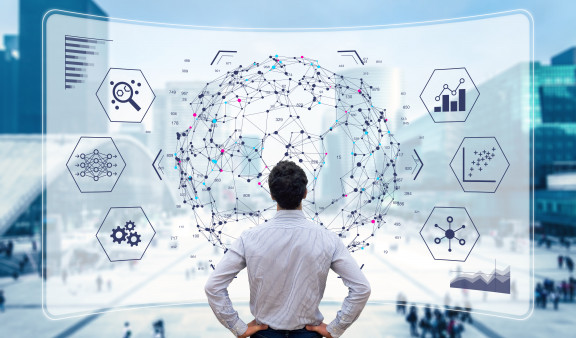

#### This dataset contains all purchases made for an online retail company based in the UK during an eight month period.



In [19]:
import pandas as pd
import numpy as np
import datetime as dt
import openpyxl
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# virgülden sonra kaç basamağını göstereyim - lambda kısmı

In [2]:
df_ = pd.read_excel('online_retail_II.xlsx',sheet_name="Year 2009-2010")

In [3]:
df = df_.copy()

In [4]:
def datareview(dataframe):
    print("******head******")
    print(dataframe.head(10))
    print("******shape******")
    print(dataframe.shape)
    print("******info********")
    print(dataframe.info())
    print("******describe********")
    print(dataframe.describe().T)
    print("***** Nan data********")
    print(dataframe.isnull().sum())

In [8]:
datareview(df)

******head******
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5  489434     22064           PINK DOUGHNUT TRINKET POT         24   
6  489434     21871                  SAVE THE PLANET MUG        24   
7  489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8  489435     22350                            CAT BOWL         12   
9  489435     22349       DOG BOWL , CHASING BALL DESIGN        12   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00  6.950    13085.000  United Kingdom  
1 2009-12-01 07:45:00  6.750    13085.000  United Kingdom  
2 2009-12-01 07:45:00  6.750    

In [7]:
df.dropna(inplace=True)

In [9]:
def uniqcount(dataframe):
    for col in dataframe:
        df[col].unique()
        print(f'sayılan:{col}')
        print(df[col].unique())
        
        
def nuniqcount(dataframe):
    for col in dataframe:
        df[col].nunique()
        print(f'sayılan:{col}')
        print(df[col].nunique())

In [10]:
uniqcount(df)

sayılan:Invoice
[489434 489435 489436 ... 538169 538170 538171]
sayılan:StockCode
[85048 '79323P' '79323W' ... 22936 22935 22933]
sayılan:Description
['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' ... 'BAKING MOULD ROSE MILK CHOCOLATE'
 'BAKING MOULD CHOCOLATE CUP CAKES' 'BAKING MOULD EASTER EGG MILK CHOC']
sayılan:Quantity
[   12    48    24    10    18     3    16     4     2     6     8     1
    28    30    60    32    56     9    25    36    20   -12    -6    -4
   -24    -3    -2   576   288    27    64   160     5    -1    72    50
    54     7   800    11    58   192    96   144   100   180   216    15
   240   108    33    90    81   -81   -48    17    -5    40    -8    -9
    13    21   120   200   168    19   280   128  -150   -18   -23    80
   300   450    14    61   480    -7    46   504    45  4320  5184  4008
    22   600   505   500    23    47   432   252    75   -16  -504  -600
  -252  -246   -36   360   107    49    42    66   -1

In [22]:
df["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    3153
REGENCY CAKESTAND 3 TIER              1706
STRAWBERRY CERAMIC TRINKET BOX        1407
ASSORTED COLOUR BIRD ORNAMENT         1369
HOME BUILDING BLOCK WORD              1219
Name: Description, dtype: int64

In [24]:
df.groupby("Description").agg({"Quantity": "sum"}).head()

Quantity
Description                                  
  DOORMAT UNION JACK GUNS AND ROSES       169
 3 STRIPEY MICE FELTCRAFT                 663
 4 PURPLE FLOCK DINNER CANDLES            200
 ANIMAL STICKERS                          385
 BLACK PIRATE TREASURE CHEST               47

In [11]:
nuniqcount(df)

sayılan:Invoice
23587
sayılan:StockCode
4031
sayılan:Description
4459
sayılan:Quantity
500
sayılan:InvoiceDate
21786
sayılan:Price
664
sayılan:Customer ID
4383
sayılan:Country
37


In [14]:
df.sort_values(by='Quantity', ascending=False).head(5)

Invoice StockCode                         Description  Quantity  \
90857   497946     37410  BLACK AND WHITE PAISLEY FLOWER MUG     19152   
127166  501534     21099         SET/6 STRAWBERRY PAPER CUPS     12960   
127168  501534     21091         SET/6 WOODLAND PAPER PLATES     12960   
127169  501534     21085           SET/6 WOODLAND PAPER CUPS     12744   
127167  501534     21092       SET/6 STRAWBERRY PAPER PLATES     12480   

               InvoiceDate  Price  Customer ID  Country  
90857  2010-02-15 11:57:00  0.100    13902.000  Denmark  
127166 2010-03-17 13:09:00  0.100    13902.000  Denmark  
127168 2010-03-17 13:09:00  0.100    13902.000  Denmark  
127169 2010-03-17 13:09:00  0.100    13902.000  Denmark  
127167 2010-03-17 13:09:00  0.100    13902.000  Denmark

In [15]:
df = df[~df["Invoice"].str.contains("C", na=False)]

In [16]:
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [17]:
df["InvoiceDate"].max()

Timestamp('2010-12-09 20:01:00')

In [21]:
today_date = dt.datetime(2010, 12, 11)
today_date

datetime.datetime(2010, 12, 11, 0, 0)

In [25]:
RFM = df.groupby('Customer ID').agg({'InvoiceDate': lambda x: (today_date - x.max()).days,
                                  'Invoice': lambda x: x.nunique(),
                                  'TotalPrice': lambda x: x.sum()})

In [26]:
RFM.head()

InvoiceDate  Invoice  TotalPrice
Customer ID                                  
12346.000            165       11     372.860
12347.000              3        2    1323.320
12348.000             74        1     222.160
12349.000             43        3    2671.140
12351.000             11        1     300.930

In [29]:
RFM.columns = ["recency", "frequency","monetary"]

In [31]:
RFM.describe().T

count     mean      std   min     25%     50%      75%        max
recency   4314.000   91.270   96.944 1.000  18.000  53.000  136.000    374.000
frequency 4314.000    4.454    8.169 1.000   1.000   2.000    5.000    205.000
monetary  4314.000 2047.289 8912.523 0.000 307.950 705.550 1722.802 349164.350

In [33]:
RFM = RFM[RFM["monetary"] > 0]

In [35]:
RFM.shape

(4312, 3)

In [40]:
RFM["recency_score"] = pd.qcut(RFM["recency"], 5, labels=[5, 4, 3, 2, 1])

RFM["frequency_score"] = pd.qcut(RFM["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

RFM["monetary_score"] = pd.qcut(RFM["monetary"], 5, labels=[1, 2, 3, 4, 5])



In [41]:
RFM.head()

recency  frequency  monetary recency_score monetary_score  \
Customer ID                                                              
12346.000        165         11   372.860             2              2   
12347.000          3          2  1323.320             5              4   
12348.000         74          1   222.160             2              1   
12349.000         43          3  2671.140             3              5   
12351.000         11          1   300.930             5              2   

            frequency_score  
Customer ID                  
12346.000                 5  
12347.000                 2  
12348.000                 1  
12349.000                 3  
12351.000                 1

In [45]:
RFM["RF_SCORE"] = (RFM['recency_score'].astype(str) +
                    RFM['frequency_score'].astype(str))

In [46]:
# regular exp. basic
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [48]:
RFM['segment'] = RFM['RF_SCORE'].replace(seg_map, regex=True)

In [49]:
RFM.head()

recency  frequency  monetary recency_score monetary_score  \
Customer ID                                                              
12346.000        165         11   372.860             2              2   
12347.000          3          2  1323.320             5              4   
12348.000         74          1   222.160             2              1   
12349.000         43          3  2671.140             3              5   
12351.000         11          1   300.930             5              2   

            frequency_score RF_SCORE              segment  
Customer ID                                                
12346.000                 5       25           cant_loose  
12347.000                 2       52  potential_loyalists  
12348.000                 1       21          hibernating  
12349.000                 3       33       need_attention  
12351.000                 1       51        new_customers

In [50]:
RFM[["segment", "recency", "frequency" ,"monetary"]].groupby("segment").agg(["mean", "count"])

recency       frequency       monetary      
                       mean count      mean count     mean count
segment                                                         
about_to_sleep       53.819   343     1.201   343  441.320   343
at_Risk             152.159   611     3.074   611 1188.878   611
cant_loose          124.117    77     9.117    77 4099.450    77
champions             7.119   663    12.554   663 6852.264   663
hibernating         213.886  1015     1.126  1015  403.978  1015
loyal_customers      36.287   742     6.830   742 2746.067   742
need_attention       53.266   207     2.449   207 1060.357   207
new_customers         8.580    50     1.000    50  386.199    50
potential_loyalists  18.793   517     2.017   517  729.511   517
promising            25.747    87     1.000    87  367.087    87

In [51]:
RFM[RFM["segment"] == "about_to_sleep"].head()

recency  frequency  monetary recency_score monetary_score  \
Customer ID                                                              
12353.000         44          1   317.760             3              2   
12379.000         58          2   767.980             3              3   
12387.000         51          1   143.940             3              1   
12400.000         50          1   205.250             3              1   
12411.000         45          1   346.900             3              2   

            frequency_score RF_SCORE         segment  
Customer ID                                           
12353.000                 1       31  about_to_sleep  
12379.000                 2       32  about_to_sleep  
12387.000                 1       31  about_to_sleep  
12400.000                 1       31  about_to_sleep  
12411.000                 1       31  about_to_sleep

In [52]:
RFM[RFM["segment"] == "champions"].head()

recency  frequency  monetary recency_score monetary_score  \
Customer ID                                                              
12360.000         15          5  1590.830             5              4   
12395.000          7          4  2048.640             5              4   
12415.000         11          7 19543.840             5              5   
12429.000          1          5  3735.510             5              5   
12431.000          9         13  4370.520             5              5   

            frequency_score RF_SCORE    segment  
Customer ID                                      
12360.000                 4       54  champions  
12395.000                 4       54  champions  
12415.000                 5       55  champions  
12429.000                 4       54  champions  
12431.000                 5       55  champions

In [53]:
RFM[RFM["segment"] == "cant_loose"].head()

recency  frequency  monetary recency_score monetary_score  \
Customer ID                                                              
12346.000        165         11   372.860             2              2   
12380.000        101          7  6951.490             2              5   
12482.000        212         29 23691.400             1              5   
12510.000         95          7  4195.450             2              5   
12891.000         94          8   509.500             2              3   

            frequency_score RF_SCORE     segment  
Customer ID                                       
12346.000                 5       25  cant_loose  
12380.000                 5       25  cant_loose  
12482.000                 5       15  cant_loose  
12510.000                 5       25  cant_loose  
12891.000                 5       25  cant_loose

In [54]:
RFM[RFM["segment"] == "loyal_customers"].index

Float64Index([12359.0, 12402.0, 12409.0, 12417.0, 12422.0, 12435.0, 12437.0,
              12454.0, 12476.0, 12500.0,
              ...
              18220.0, 18223.0, 18231.0, 18236.0, 18241.0, 18247.0, 18276.0,
              18277.0, 18283.0, 18287.0],
             dtype='float64', name='Customer ID', length=742)

In [62]:
new_df = pd.DataFrame()

In [63]:
new_df["loyal_customers_id"] = RFM[RFM["segment"] == "loyal_customers"].index

In [64]:
new_df["loyal_customers_id"] = new_df["loyal_customers_id"].astype(int)

In [67]:
new_df

loyal_customers_id
0                 12359
1                 12402
2                 12409
3                 12417
4                 12422
..                  ...
737               18247
738               18276
739               18277
740               18283
741               18287

[742 rows x 1 columns]

In [66]:
new_df.to_csv("loyal_customers_id")